In [84]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [85]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [86]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [87]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [88]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)



In [89]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [90]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [91]:
#Columns for measurement
print(measurement.__table__.columns)

#Columns for stations
print(station.__table__.columns)

ImmutableColumnCollection(measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs)
ImmutableColumnCollection(station.id, station.station, station.name, station.latitude, station.longitude, station.elevation)


In [92]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [93]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

<Axes: title={'center': 'Precipation Over Time'}, xlabel='Date', ylabel='Inches'>

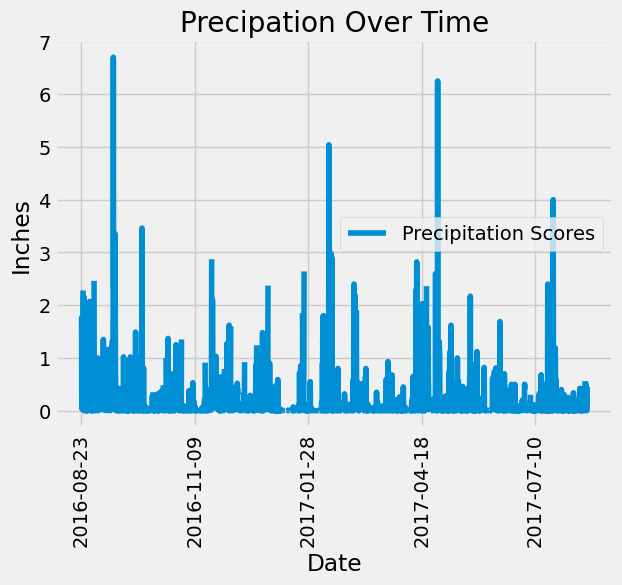

In [94]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
# Calculate the date one year from the last date in data set.
most_recent_year_before = dt.datetime.strptime(most_recent[0], "%Y-%m-%d") - dt.timedelta(days = 366)

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= most_recent_year_before).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data, columns= ["Date", "Precipitation Scores"])
df.set_index("Date", inplace=True)

# Sort the dataframe by date
df.sort_values(by= "Date", inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot = 90, ylabel="Inches", xlabel= "Date", title= "Precipation Over Time")

In [95]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation Scores
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [96]:
# Design a query to calculate the total number of stations in the dataset
num_station = session.query(func.count(station.id)).distinct(station.id).all()
num_station

[(9,)]

In [97]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(measurement.station, func.count(measurement.station))\
            .group_by(measurement.station)\
            .order_by(func.count(measurement.station).desc()).all()
stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [98]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_activate_station = session.query(func.min(measurement.tobs),func.max(measurement.tobs), func.avg(measurement.tobs))\
                        .filter(measurement.station == 'USC00519281').all()
print(most_activate_station)

[(54.0, 85.0, 71.66378066378067)]


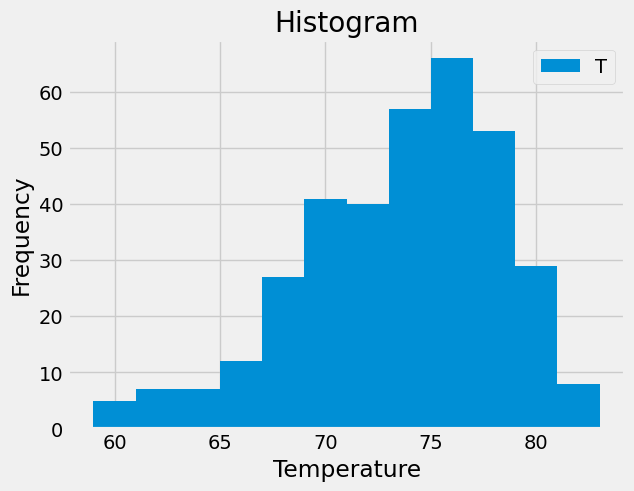

In [99]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures = session.query(measurement.tobs).filter(measurement.date >= most_recent_year_before).filter(measurement.station == 'USC00519281').all()
df_tobs = pd.DataFrame(temperatures, columns = ["Temperature"])

df_tobs.hist(bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.legend("Temperature")


# Close Session

In [100]:
# Close Session
session.close()